# Alternus Vera Project
### Golnaz Bidabadi (008022755)




## Identifying  the Fake News Detection Factors
I explored some of the potential approaches for detection of fake news based on Shu, et. al (2017) paper. "Liar, Liar Pants on Fire" dataset, which is a dataset for experimental research on fake news detection (Wang, 2017), was used in this experiment.

Considering Shu, et. al (2017) paper, one of the first steps that we need to take for detection of fake news is to identify the main factors that would be considered in our computation of the fake-news-likelihood scores. Based on Shu, et. al (2017) paper, 10 of the most important factors for detection of fake news were identified:
1. Truthfulness of major claims
2.  Style credibility
3. Stance values of relevant posts
4. Credibility of relevant posts
5. <span style="color:red"> **Credibility of lexical features** </span> <=  **one of the target factor of this experiment**
6. Credibility of syntactic features
7. Individual-level credibility (publisher credibility or <span style="color:red"> **speaker reputation** </span>) <= **Another target factor of this experiment**	
8. Group-level credibility of posts
9. Temporal-level credibility of posts
10. Network-based credibility




In this experiment I tried to explore whether basic lexical features and speaker reputation themselves would be useful in detection of fake news and determination of level of trueness of news. 

Another point worth mentioning is that truth and false are relative and they are very hard to be measured. So the goal was not to find whether news is just fake or not fake (true or false). That's why the Liar Liar dataset has been classified and consists of 6 different classes. **Detection of fake news is a multi-classification problem and it's not a binary classification problem**


In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import nltk
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from graphviz import Digraph

import seaborn as sb

path_train='../Fake_News_Assignment/liar_dataset/train.tsv'
path_test='../Fake_News_Assignment/liar_dataset/test.tsv'
path_valid='../Fake_News_Assignment/liar_dataset/valid.tsv'


train_data = pd.read_csv(path_train, sep='\t', header = None)
train_data.head()

C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [2]:
test_data = pd.read_csv(path_test, sep='\t', header = None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [3]:
valid_data = pd.read_csv(path_valid, sep='\t', header = None)
valid_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


# Data Prepration and Data Exploration: 
    
### - Adding Column names
The dataset did not include the name of the columns. Therefore, I added the column names. 

### - Converting label classes to numeric
I converted the categorical labels to numeric labels. This would be potentially used later to train classifires. In particular, if we later aim to use neural networks, this could be used for a numeric prediction.

### - Analysis of the data values in the target columns
Since the statement column includes no missing values and also has natural language sentences, no further value analysis on this column seemed to be necessary. 

### - Removing numbers and punctuations; conversion to string

### - Stemming
For three of the lexical features (out of 4 features) we shouldn't preprocess the statement texts (e.g. stemming) since we aimed to extract these features from the text as it is. Feature 4 (Frequency of unique words per statement) needed preprocessing, including removing numbers and punctuations, conversion to string, stemming, etc.

### - Bag of words
It was used to infer the unique words frequency in each statement


# Adding Column names
As it is clear, the dataset does not have the name of the columns. Therefore, I'm adding the headers to the dataset so we can make more sense of our data.


In [4]:
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
train_data.columns = columns
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [5]:
test_data.columns = columns
test_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [6]:
valid_data.columns = columns
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [7]:
#exporting the sub-datasets to CSV files (for integration)
# train_data.to_csv('../Fake_News_Assignment/liar_dataset/export/train_data.csv', encoding='utf-8')
# test_data.to_csv('../Fake_News_Assignment/liar_dataset/export/test_data.csv', encoding='utf-8')
# valid_data.to_csv('../Fake_News_Assignment/liar_dataset/export/valid_data.csv', encoding='utf-8')

# Adding a numeric label column
Here, we convert the categorical labels to numeric labels. This would be potentially used later to train classifires. In particular, if we later aim to use neural networks, this could be used for a numeric prediction.

The conversion method was based on a simple division of 100 to 6 (as we have 6 classes).

In [8]:
def label_to_numeric(label):
    if label=="true":
        return(100)
    elif label=="mostly-true":
        return(66)
    elif label=="half-true":
        return(50)
    elif label=="barely-true":
        return(33)
    elif label=="false":
        return(16)
    else:
        return(0)

train_data['label-numeric'] = train_data['label'].apply(lambda x : label_to_numeric(x))
train_data.head()

test_data['label-numeric'] = test_data['label'].apply(lambda x : label_to_numeric(x))
test_data.head()

valid_data['label-numeric'] = valid_data['label'].apply(lambda x : label_to_numeric(x))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,16
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50


# Checking the distribution of the classes based on the "label"


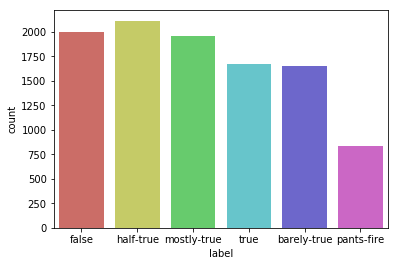

In [9]:
sb.countplot(x='label', data=train_data, palette='hls')

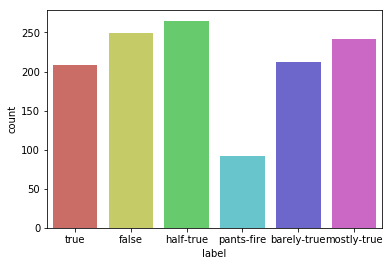

In [10]:
sb.countplot(x='label', data=test_data, palette='hls')

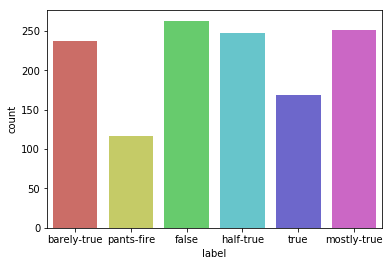

In [11]:
sb.countplot(x='label', data=valid_data, palette='hls')

As we can see all datasets consist of different types of label-classes. Therefore all classes should be considered in the classification process and none of them should be dropped.


# Word Cloud Visualization for getting a sense of the statements

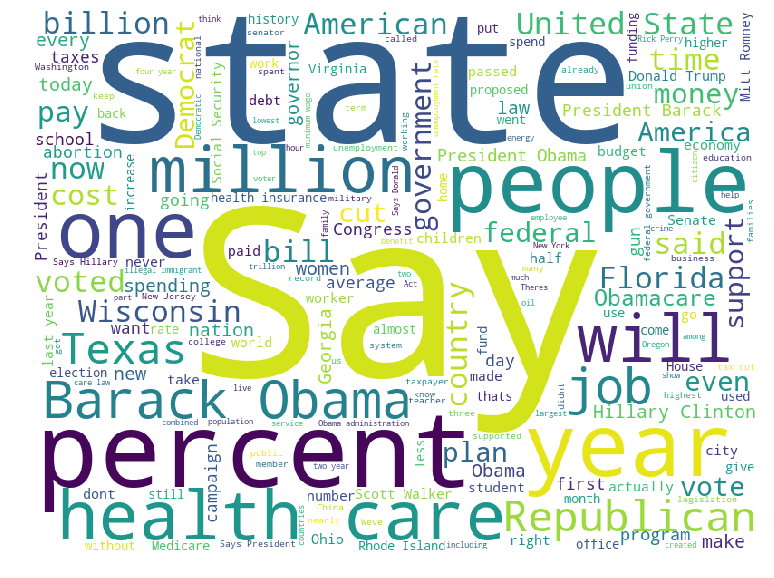

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_data['statement']))

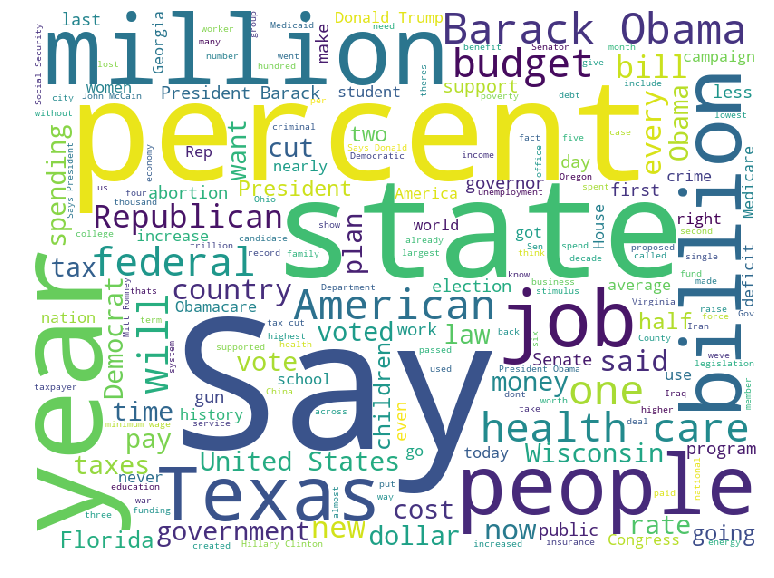

In [13]:
cloud(' '.join(test_data['statement']))

# Checking the missing values

In [14]:
train_data.isnull().sum()

id                         0
label                      0
statement                  0
subjects                   2
speaker                    2
speaker_job             2897
state                   2208
party                      2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
label-numeric              0
dtype: int64

In [15]:
train_data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 15 columns):
id                      10240 non-null object
label                   10240 non-null object
statement               10240 non-null object
subjects                10238 non-null object
speaker                 10238 non-null object
speaker_job             7343 non-null object
state                   8032 non-null object
party                   10238 non-null object
barely_true_counts      10238 non-null float64
false_counts            10238 non-null float64
half_true_counts        10238 non-null float64
mostly_true_counts      10238 non-null float64
pants_on_fire_counts    10238 non-null float64
context                 10138 non-null object
label-numeric           10240 non-null int64
dtypes: float64(5), int64(1), object(9)
memory usage: 1.2+ MB


In [16]:
test_data.isnull().sum()

id                        0
label                     0
statement                 0
subjects                  0
speaker                   0
speaker_job             325
state                   262
party                     0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  17
label-numeric             0
dtype: int64

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 15 columns):
id                      1267 non-null object
label                   1267 non-null object
statement               1267 non-null object
subjects                1267 non-null object
speaker                 1267 non-null object
speaker_job             942 non-null object
state                   1005 non-null object
party                   1267 non-null object
barely_true_counts      1267 non-null int64
false_counts            1267 non-null int64
half_true_counts        1267 non-null int64
mostly_true_counts      1267 non-null int64
pants_on_fire_counts    1267 non-null int64
context                 1250 non-null object
label-numeric           1267 non-null int64
dtypes: int64(6), object(9)
memory usage: 148.6+ KB


In [18]:
valid_data.isnull().sum()

id                        0
label                     0
statement                 0
subjects                  0
speaker                   0
speaker_job             345
state                   279
party                     0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  12
label-numeric             0
dtype: int64

In [19]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 15 columns):
id                      1284 non-null object
label                   1284 non-null object
statement               1284 non-null object
subjects                1284 non-null object
speaker                 1284 non-null object
speaker_job             939 non-null object
state                   1005 non-null object
party                   1284 non-null object
barely_true_counts      1284 non-null int64
false_counts            1284 non-null int64
half_true_counts        1284 non-null int64
mostly_true_counts      1284 non-null int64
pants_on_fire_counts    1284 non-null int64
context                 1272 non-null object
label-numeric           1284 non-null int64
dtypes: int64(6), object(9)
memory usage: 150.5+ KB


# FACTOR 1: LEXICAL FEATURE CREDIBILITY


# Data Enrichment based on the lexical features
Considering the best practice of fake news detection, discussed by Shu, et. al (2017), the following lexical features where chosen to be extracted from the statement values:
- Total  number of words per statement,
- Average number of characters per word (average word length)
- Frequency of long words
- Frequency of unique words, based on the Bag-of-words model


## Lexical Feature 1: The total number of words per statement

### Adding the total number of words per statement as a new culumn to the datasets (data enrichment)

In [20]:
train_data['word_number'] = train_data['statement'].apply(lambda x : len(x.split()))
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,16,11
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,16,12
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10


In [21]:
test_data['word_number'] = test_data['statement'].apply(lambda x : len(x.split()))
test_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,100,11
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,16,12
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,16,10
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,50,13
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0,23


In [22]:
valid_data['word_number'] = valid_data['statement'].apply(lambda x : len(x.split()))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,16,32
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33


## Lexical Feature 2:  The average number of characters per word per statement

### Adding the average number of characters per word per statement to the datasets (data enrichment)

In [23]:
train_data['average_word_length'] = train_data['statement'].apply(lambda x : sum(len(word) for word in x.split()) / len(x.split()))
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,16,11,6.545455
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24,4.916667
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19,4.578947
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,16,12,5.583333
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10,4.500000


In [24]:
test_data['average_word_length'] = test_data['statement'].apply(lambda x : sum(len(word) for word in x.split()) / len(x.split()))
test_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,100,11,5.272727
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,16,12,4.333333
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,16,10,4.200000
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,50,13,5.615385
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0,23,4.565217


In [25]:
valid_data['average_word_length'] = valid_data['statement'].apply(lambda x : sum(len(word) for word in x.split()) / len(x.split()))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10,4.200000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26,4.730769
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,16,32,5.406250
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8,4.875000
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33,4.787879


## Lexical Feature 3:  The long-words frequency per statement


### Adding the long-words frequency per statement to the datasets (data enrichment)

In [26]:
def long_word_detector(word):
    if len(word) > 8:
        return(1)
    else:
        return(0)
    
train_data['long_words_frequency'] = train_data['statement'].apply(lambda x : sum(long_word_detector(word) for word in x.split()))
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,16,11,6.545455,3
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24,4.916667,2
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19,4.578947,0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,16,12,5.583333,2
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10,4.500000,1


In [27]:
test_data['long_words_frequency'] = test_data['statement'].apply(lambda x : sum(long_word_detector(word) for word in x.split()))
test_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,100,11,5.272727,2
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,16,12,4.333333,1
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,16,10,4.200000,0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,50,13,5.615385,1
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0,23,4.565217,0


In [28]:
valid_data['long_words_frequency'] = valid_data['statement'].apply(lambda x : sum(long_word_detector(word) for word in x.split()))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10,4.200000,1
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26,4.730769,3
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,16,32,5.406250,4
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8,4.875000,0
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33,4.787879,3


# Lexical Feature 4: Frequency of unique words per statement
A word has been defined as unique, if it has been used only and only in one of the statements.



## Data preperation for extracting frequency of unique words
### Removing numbers and punctuations; conversion to string

In [29]:
all_statements_list = ""

all_statements_list = valid_data['statement'].apply(lambda x : all_statements_list + re.sub(r'\d+', '', x)) #removing numbers using regular expressions

all_statements = ''.join(all_statements_list) #converting the statement list to a string

tokenizer = RegexpTokenizer(r'\w+')
tokenized_no_punctuation= tokenizer.tokenize(all_statements)

all_statements_cleaned = ' '.join(tokenized_no_punctuation) #removing punctuation using NLTK tokenizer

print(all_statements_cleaned)

We have less Americans working now than in the s When Obama was sworn into office he DID NOT use the Holy Bible but instead the Kuran Their equivalency to our Bible but very different beliefs Says Having organizations parading as being social welfare organizations and then being involved in the political combat harkens back to why the statute a hundred years ago said that they were prohibited Says nearly half of Oregons children are poor On attacks by Republicans that various programs in the economic stimulus plan are not stimulative If you add all that stuff up it accounts for less than percent of the overall package Says when armed civilians stop mass shootings with guns an average of people die otherwise an average of people die Says Tennessee is providing millions of dollars to virtual school company for results at the bottom of the bottom The health care reform plan would set limits similar to the socialized system in Britain where people are allowed to die if their treatment woul

### Stemming and making the Bag-of-words model

For three of the lexical features (out of 4 features) we shouldn't preprocess the statement texts (e.g. stemming) since we aimed to extract these features from the text as it is. Feature 4 (Frequency of unique words per statement) needed preprocessing, including removing numbers and punctuations, conversion to string, stemming, etc.


It should be considered that since the Bag-of-words model has only been used for identification of unique words, there is no need to remove stop words from the data.

In [30]:
sno = nltk.stem.SnowballStemmer('english') #using the snowballStemmer to stem the words
s1 = all_statements.split(' ')
statement_data_frame = pd.DataFrame(s1) 
s2 = statement_data_frame[0].apply(lambda x: sno.stem(x))
counts =  Counter(s2)
print(counts)

Counter({'the': 1091, 'of': 592, 'to': 546, 'in': 523, 'a': 444, 'and': 336, '': 335, 'for': 247, 'that': 231, 'is': 212, 'on': 169, 'has': 149, 'than': 148, 'have': 143, 'are': 130, 'was': 121, 'by': 116, 'state': 115, 'percent': 112, 'more': 112, 'it': 110, 'health': 98, 'with': 95, 'from': 95, ',': 92, 'tax': 92, '$': 90, 'not': 88, 'obama': 86, 'as': 86, 'be': 80, 'we': 78, 'year': 76, 'will': 76, 'job': 75, 'their': 73, 'our': 72, 'care': 72, 'new': 69, 'million': 65, 'at': 64, 'would': 63, 'vote': 61, 'he': 60, 'peopl': 60, 'presid': 59, 'were': 58, 'or': 54, 'no': 54, 'one': 53, 'i': 53, 'american': 52, 'you': 52, 'his': 52, 'feder': 52, 'who': 52, 'been': 52, 'up': 51, 'support': 50, 'this': 49, 'plan': 47, 'go': 46, 'spend': 46, 'out': 46, 'they': 45, 'an': 45, 'bill': 45, 'had': 45, 'rate': 45, 'nation': 44, 'republican': 43, 'over': 43, 'last': 43, 'billion': 42, 'democrat': 40, '.': 39, 'u.s.': 39, 'govern': 38, 'about': 38, 'budget': 38, 'school': 37, 'ani': 37, 'say': 37,

## Adding the Frequency of unique words per statement to the datasets (data enrichment)

In [31]:
def unique_word_detector(word):
    if counts[word] == 1:
        return(1)
    else:
        return(0)

train_data['unique_words_frequency'] = train_data['statement'].apply(lambda x : sum(unique_word_detector(word) for word in x.split()))
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency,unique_words_frequency
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,16,11,6.545455,3,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24,4.916667,2,2
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19,4.578947,0,0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,16,12,5.583333,2,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10,4.500000,1,1


In [32]:
test_data['unique_words_frequency'] = test_data['statement'].apply(lambda x : sum(unique_word_detector(word) for word in x.split()))
test_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency,unique_words_frequency
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,100,11,5.272727,2,1
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,16,12,4.333333,1,1
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,16,10,4.200000,0,0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,50,13,5.615385,1,0
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0,23,4.565217,0,2


In [33]:
valid_data['unique_words_frequency'] = valid_data['statement'].apply(lambda x : sum(unique_word_detector(word) for word in x.split()))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency,unique_words_frequency
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10,4.200000,1,0
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26,4.730769,3,0
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,16,32,5.406250,4,0
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8,4.875000,0,0
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33,4.787879,3,2


# Decision-Tree classifier based on the extracted lexical features (as a vector)

In [34]:
#Data slicing
x_train = train_data.values[:, 15:19]
y_train = train_data.values[:,1]
#y_train=y_train.astype('float') #only needed if we want to use numeric labels

x_test = test_data.values[:, 15:19]
y_test = test_data.values[:,1]
#y_test=y_test.astype('float')


In [35]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=70)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=70, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

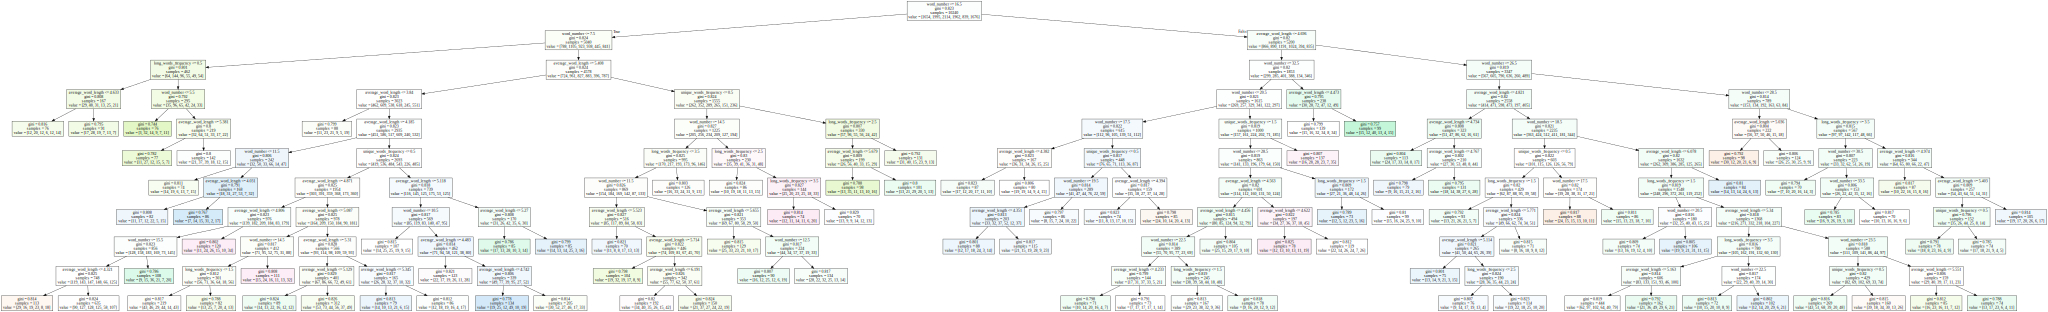

In [36]:
# class labels
training_fields = ['word_number','average_word_length','long_words_frequency','unique_words_frequency']
labels = training_fields[0:]

graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=labels
   , filled = True))

display(SVG(graph.pipe(format='svg')))



In [37]:
#export the decisoin tree as a png file; Only needed for exporting the decision tree for the documentation
#graph.format = 'png'
#graph.render('../Fake_News_Assignment/liar_dataset/decision-tree', view=True)

In [38]:
y_pred = clf_gini.predict(x_test)
y_pred

array(['mostly-true', 'true', 'barely-true', ..., 'half-true',
       'mostly-true', 'barely-true'], dtype=object)

In [39]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  21.152328334648775


In [40]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

barely-true       0.13      0.04      0.06       212
      false       0.23      0.28      0.26       249
  half-true       0.22      0.43      0.29       265
mostly-true       0.23      0.25      0.24       241
 pants-fire       0.00      0.00      0.00        92
       true       0.12      0.07      0.09       208

avg / total       0.18      0.21      0.18      1267



C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Mapping the lexical features vector to a scaler feature

Four lexical features were extracted, each of them was added as a separate column to the dataset and the classifier was trained based on that feature.  A function was calculated and developed to map the lexical features vector to a scalar factor.

The below function shows the polynomial equation that was used for calculation of the lexical features factor. word_number and average_word_lenge are normalized. The weightings were identified by more than 100 times different try-and-error training of a decision tree classifier.  In each try different weights were assigned to each feature to find out the optimal weightings.  

- Important observed result: **out of the four features created for lexical features “frequency of unique words” has the most impact on the detection of fake news**.  As a result, the highest weight was assigned to this feature in the equation.

In [42]:
def lexical_factor_vector_score(word_number,average_word_length,long_words_frequency,unique_words_frequency):
    return(word_number/10+average_word_length/5+long_words_frequency+9*unique_words_frequency)

train_data['lexical_factor_vector_score'] = train_data.apply(lambda row: lexical_factor_vector_score(row['word_number'],row['average_word_length'], row['long_words_frequency'], row['unique_words_frequency']), axis=1)
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency,unique_words_frequency,lexical_factor_vector_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,16,11,6.545455,3,0,5.409091
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24,4.916667,2,2,23.383333
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19,4.578947,0,0,2.815789
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,16,12,5.583333,2,0,4.316667
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10,4.500000,1,1,11.900000


In [43]:
test_data['lexical_factor_vector_score'] = test_data.apply(lambda row: lexical_factor_vector_score(row['word_number'],row['average_word_length'], row['long_words_frequency'], row['unique_words_frequency']), axis=1)
test_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency,unique_words_frequency,lexical_factor_vector_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,100,11,5.272727,2,1,13.154545
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,16,12,4.333333,1,1,12.066667
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,16,10,4.200000,0,0,1.840000
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,50,13,5.615385,1,0,3.423077
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0,23,4.565217,0,2,21.213043


In [44]:
valid_data['lexical_factor_vector_score'] = valid_data.apply(lambda row: lexical_factor_vector_score(row['word_number'],row['average_word_length'], row['long_words_frequency'], row['unique_words_frequency']), axis=1)
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency,unique_words_frequency,lexical_factor_vector_score
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10,4.200000,1,0,2.840000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26,4.730769,3,0,6.546154
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,16,32,5.406250,4,0,8.281250
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8,4.875000,0,0,1.775000
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33,4.787879,3,2,25.257576


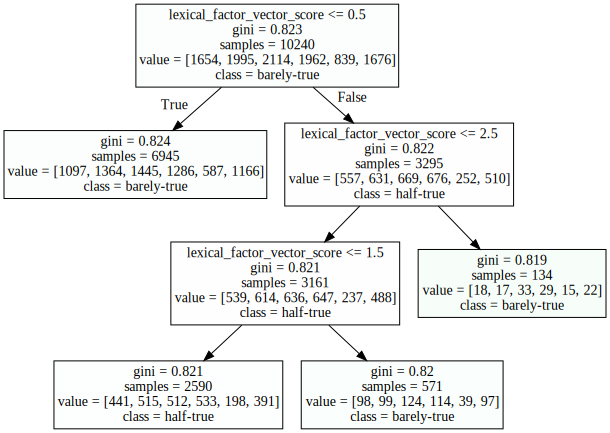

In [45]:
#Data slicing
x_train = train_data.values[:, [18]]
y_train = train_data.values[:,1]

x_test = test_data.values[:, [18]]
y_test = test_data.values[:,1]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=70)
clf_gini.fit(x_train, y_train)

# class labels
training_fields = ['lexical_factor_vector_score']
labels = training_fields[0:]

graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=labels, class_names=['pants-fire','false', 'barely-true','half-true','mostly-true','true'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [46]:
y_pred = clf_gini.predict(x_test)
y_pred

print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))

Accuracy is  20.599842146803475
             precision    recall  f1-score   support

barely-true       0.00      0.00      0.00       212
      false       0.00      0.00      0.00       249
  half-true       0.21      0.73      0.32       265
mostly-true       0.20      0.28      0.24       241
 pants-fire       0.00      0.00      0.00        92
       true       0.00      0.00      0.00       208

avg / total       0.08      0.21      0.11      1267



C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### As you can seee above Accuracy is   21.468034727703238

# Naive Bayes Classifier on the lexical features on the mapped-to-scaler lexical features

In [47]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[  0 153  59   0   0   0]
 [  0 163  86   0   0   0]
 [  0 176  89   0   0   0]
 [  0 159  82   0   0   0]
 [  0  60  32   0   0   0]
 [  0 144  64   0   0   0]]


In [48]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

barely-true       0.00      0.00      0.00       212
      false       0.19      0.65      0.30       249
  half-true       0.22      0.34      0.26       265
mostly-true       0.00      0.00      0.00       241
 pants-fire       0.00      0.00      0.00        92
       true       0.00      0.00      0.00       208

avg / total       0.08      0.20      0.11      1267



C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Naive Bayes Classifier on the lexical features on the vector lexical features

In [49]:
#Data slicing
x_train = train_data.values[:, 15:19]
y_train = train_data.values[:,1]
#y_train=y_train.astype('float') #only needed if we want to use numeric labels

x_test = test_data.values[:, 15:19]
y_test = test_data.values[:,1]
#y_test=y_test.astype('float')

from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0  40 144  23   0   5]
 [  0  63 169  12   0   5]
 [  0  52 187  23   0   3]
 [  0  45 169  23   0   4]
 [  0  13  67  10   0   2]
 [  0  42 147  16   0   3]]
             precision    recall  f1-score   support

barely-true       0.00      0.00      0.00       212
      false       0.25      0.25      0.25       249
  half-true       0.21      0.71      0.33       265
mostly-true       0.21      0.10      0.13       241
 pants-fire       0.00      0.00      0.00        92
       true       0.14      0.01      0.03       208

avg / total       0.16      0.22      0.15      1267



C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Factor 2:  Speaker Reputation

Speaker reputation is my second factor for detecting the fake news. For this purpose, I considered the available information provided by our dataset. After an analysis which is reflected in our documentation, I chose the features of “barely_true_counts, false_counts, half_true_counts, mostly_true_counts” to make a vector for speaker reputation. 

The hypotheses here is that, it might be possible to infer fake-news based on the number of fake news that have been assigned to the speakers previously. Clearly, this does not mean that a speaker, e.g. Barak Obama, is a person who produces the fake-news or every single news about a particular speaker is fake. However, what could be inferred from my assumption is the possibility that a fake-news is produced about a particular speaker could be higher than others. E.g. it might be the case that the number of fake-news that are produced about Obama are more than Trump.  Therefore, the history of (the number of) fake- or not-fake news about a speaker is considered in my study here. 


In [50]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 8:13]
y_train = train_data.values[:,14]
y_train = y_train.astype('float')


x_test = test_data.values[:, 8:13]
y_test = test_data.values[:,14]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))


[[ 20   2   6   0   0  64]
 [ 17   2   7  17  10 196]
 [ 11   2   5   8  12 174]
 [  8   5   4  15  27 206]
 [  5   3   4  15  23 191]
 [  7   3   2  11  21 164]]


In [51]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.29      0.22      0.25        92
       16.0       0.12      0.01      0.02       249
       33.0       0.18      0.02      0.04       212
       50.0       0.23      0.06      0.09       265
       66.0       0.25      0.10      0.14       241
      100.0       0.16      0.79      0.27       208

avg / total       0.20      0.18      0.12      1267



# Experimental testing of Deep Learning/Neural Networks

 To test whether this could improve the result in classification of news based on the speaker reputation features

In [52]:
# Importing Keras Sequential Model
from keras.models import Sequential
from keras.layers import Dense
import numpy

# Initializing the seed value to a integer.
seed = 7

numpy.random.seed(seed)

# Loading the input values to X and Label values Y using slicing.

X = train_data.values[:, 8:13]
Y = train_data.values[:,14]
X=X.astype('float')
Y=Y.astype('float')

# Initializing the Sequential model from KERAS.
model = Sequential()

# Creating a 16 neuron hidden layer with Linear Rectified activation function.
model.add(Dense(10, input_dim=5, init='uniform', activation='relu'))

# Creating a 8 neuron hidden layer.
model.add(Dense(5, init='uniform', activation='relu'))

# Adding a output layer.
model.add(Dense(1, init='uniform', activation='sigmoid'))



# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Fitting the model
model.fit(X, Y, nb_epoch=5, batch_size=10)

scores = model.evaluate(X, Y)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=5, activation="relu", kernel_initializer="uniform")`
C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer=

Epoch 1/5
10240/10240 [==============================] - 3s 265us/step - loss: -463.7420 - acc: 9.7656e-05
Epoch 2/5
10240/10240 [==============================] - 2s 224us/step - loss: -743.5568 - acc: 0.0000e+00
Epoch 3/5
10240/10240 [==============================] - 2s 200us/step - loss: -745.8265 - acc: 0.0000e+00
Epoch 4/5
10240/10240 [==============================] - 2s 203us/step - loss: -745.8265 - acc: 0.0000e+00
Epoch 5/5
10240/10240 [==============================] - 0s 46us/step
acc: 0.00%


# Testing whether One-hot-encoding whould improve the results

In [53]:
#Converting 'labels' to numeric
train_data['label-pants-fire'] = train_data['label'].apply(lambda x : 1 if (x == 'pants-fire') else 0)
train_data['label-false'] = train_data['label'].apply(lambda x : 1 if (x == 'false') else 0)
train_data['label-barely-true'] = train_data['label'].apply(lambda x : 1 if (x == 'barely-true') else 0)
train_data['label-half-true'] = train_data['label'].apply(lambda x : 1 if (x == 'half-true') else 0)
train_data['label-mostly-true'] = train_data['label'].apply(lambda x : 1 if (x == 'mostly-true') else 0)
train_data['label-true'] = train_data['label'].apply(lambda x : 1 if (x == 'true') else 0)

test_data['label-pants-fire'] = test_data['label'].apply(lambda x : 1 if (x == 'pants-fire') else 0)
test_data['label-false'] = test_data['label'].apply(lambda x : 1 if (x == 'false') else 0)
test_data['label-barely-true'] = test_data['label'].apply(lambda x : 1 if (x == 'barely-true') else 0)
test_data['label-half-true'] = test_data['label'].apply(lambda x : 1 if (x == 'half-true') else 0)
test_data['label-mostly-true'] = test_data['label'].apply(lambda x : 1 if (x == 'mostly-true') else 0)
test_data['label-true'] = test_data['label'].apply(lambda x : 1 if (x == 'true') else 0)

valid_data['label-pants-fire'] = valid_data['label'].apply(lambda x : 1 if (x == 'pants-fire') else 0)
valid_data['label-false'] = valid_data['label'].apply(lambda x : 1 if (x == 'false') else 0)
valid_data['label-barely-true'] = valid_data['label'].apply(lambda x : 1 if (x == 'barely-true') else 0)
valid_data['label-half-true'] = valid_data['label'].apply(lambda x : 1 if (x == 'half-true') else 0)
valid_data['label-mostly-true'] = valid_data['label'].apply(lambda x : 1 if (x == 'mostly-true') else 0)
valid_data['label-true'] = valid_data['label'].apply(lambda x : 1 if (x == 'true') else 0)

In [54]:
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,...,average_word_length,long_words_frequency,unique_words_frequency,lexical_factor_vector_score,label-pants-fire,label-false,label-barely-true,label-half-true,label-mostly-true,label-true
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,6.545455,3.0,0.0,5.409091,0,1,0,0,0,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,4.916667,2.0,2.0,23.383333,0,0,0,1,0,0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,4.578947,0.0,0.0,2.815789,0,0,0,0,1,0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,0,0,none,7.0,19.0,...,5.583333,2.0,0.0,4.316667,0,1,0,0,0,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,0,Florida,democrat,15.0,9.0,...,4.500000,1.0,1.0,11.900000,0,0,0,1,0,0


## Running the naiive Bayes classifier on single labels based on the speaker reputation features

#### label: pants-fire

In [55]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 8:13]
y_train = train_data.values[:,20]
y_train = y_train.astype('float')


x_test = test_data.values[:, 8:13]
y_test = test_data.values[:,20]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[1127   48]
 [  72   20]]


In [56]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.94      0.96      0.95      1175
        1.0       0.29      0.22      0.25        92

avg / total       0.89      0.91      0.90      1267



#### label: false

In [57]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 8:13]
y_train = train_data.values[:,21]
y_train = y_train.astype('float')


x_test = test_data.values[:, 8:13]
y_test = test_data.values[:,21]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[982  36]
 [239  10]]


In [58]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.80      0.96      0.88      1018
        1.0       0.22      0.04      0.07       249

avg / total       0.69      0.78      0.72      1267



#### label: barely-true

In [59]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 8:13]
y_train = train_data.values[:,22]
y_train = y_train.astype('float')


x_test = test_data.values[:, 8:13]
y_test = test_data.values[:,22]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[1055    0]
 [ 212    0]]


In [60]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91      1055
        1.0       0.00      0.00      0.00       212

avg / total       0.69      0.83      0.76      1267



C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### label: half-true

In [61]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 8:13]
y_train = train_data.values[:,23]
y_train = y_train.astype('float')


x_test = test_data.values[:, 8:13]
y_test = test_data.values[:,23]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[958  44]
 [247  18]]


In [62]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.80      0.96      0.87      1002
        1.0       0.29      0.07      0.11       265

avg / total       0.69      0.77      0.71      1267



#### label: mostly-true

In [63]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 8:13]
y_train = train_data.values[:,24]
y_train = y_train.astype('float')


x_test = test_data.values[:, 8:13]
y_test = test_data.values[:,24]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[983  43]
 [222  19]]


In [64]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.82      0.96      0.88      1026
        1.0       0.31      0.08      0.13       241

avg / total       0.72      0.79      0.74      1267



#### label: true

In [65]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 8:13]
y_train = train_data.values[:,25]
y_train = y_train.astype('float')


x_test = test_data.values[:, 8:13]
y_test = test_data.values[:,25]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[1009   50]
 [ 196   12]]


In [66]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.84      0.95      0.89      1059
        1.0       0.19      0.06      0.09       208

avg / total       0.73      0.81      0.76      1267



## Running the naiive Bayes classifier on single labels based on the lexical features

#### label: pants-fire

In [67]:
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 15:20]
y_train = train_data.values[:,20]
y_train = y_train.astype('float')


x_test = test_data.values[:, 15:20]
y_test = test_data.values[:,20]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1174    1]
 [  92    0]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96      1175
        1.0       0.00      0.00      0.00        92

avg / total       0.86      0.93      0.89      1267



#### label:false

In [68]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 15:20]
y_train = train_data.values[:,21]
y_train = y_train.astype('float')


x_test = test_data.values[:, 15:20]
y_test = test_data.values[:,21]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1014    4]
 [ 247    2]]
             precision    recall  f1-score   support

        0.0       0.80      1.00      0.89      1018
        1.0       0.33      0.01      0.02       249

avg / total       0.71      0.80      0.72      1267



#### label: barely-true

In [69]:
from sklearn.naive_bayes import GaussianNB

from pandas import read_csv
import numpy
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 15:20]
y_train = train_data.values[:,22]
y_train = y_train.astype('float')


x_test = test_data.values[:, 15:20]
y_test = test_data.values[:,22]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1055    0]
 [ 212    0]]
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91      1055
        1.0       0.00      0.00      0.00       212

avg / total       0.69      0.83      0.76      1267



C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### label:half-true

In [70]:
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 15:20]
y_train = train_data.values[:,23]
y_train = y_train.astype('float')


x_test = test_data.values[:, 15:20]
y_test = test_data.values[:,23]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[998   4]
 [263   2]]
             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88      1002
        1.0       0.33      0.01      0.01       265

avg / total       0.70      0.79      0.70      1267



#### label: mostly-true

In [71]:
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 15:20]
y_train = train_data.values[:,24]
y_train = y_train.astype('float')


x_test = test_data.values[:, 15:20]
y_test = test_data.values[:,24]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[998  28]
 [233   8]]
             precision    recall  f1-score   support

        0.0       0.81      0.97      0.88      1026
        1.0       0.22      0.03      0.06       241

avg / total       0.70      0.79      0.73      1267



#### label: true

In [72]:
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, 15:20]
y_train = train_data.values[:,25]
y_train = y_train.astype('float')


x_test = test_data.values[:, 15:20]
y_test = test_data.values[:,25]
y_test = y_test.astype('float')




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1059    0]
 [ 208    0]]
             precision    recall  f1-score   support

        0.0       0.84      1.00      0.91      1059
        1.0       0.00      0.00      0.00       208

avg / total       0.70      0.84      0.76      1267



C:\Users\golnaz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Aggregation of lexical featurs and speaker-reputation features as a multi-dimensional vector

While, we will later apply both of the factors separately in the final polynomial equation that will be used in our group to detect the fake news. Here, as an experiment, I trained and evaluated a naïve Bayes classifier on the combination of the features of both factors (as vectors).

In [73]:
# mark zero values as missing or NaN
train_data[8:13] = train_data[8:13].replace(0, numpy.NaN)
# fill missing values with mean column values
train_data.fillna(0, inplace=True)

x_train = train_data.values[:, [8,9,10,11,12,15,16,17,18,19]]
y_train = train_data.values[:,1]


x_test = test_data.values[:, [8,9,10,11,12,15,16,17,18,19]]
y_test = test_data.values[:,1]




NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[74  4 28 26 11 69]
 [92 11 14 18 17 97]
 [92 12 33 37  8 83]
 [79  7 24 37  5 89]
 [33  6  5  2 19 27]
 [75  8 21 25  7 72]]


In [74]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

barely-true       0.17      0.35      0.23       212
      false       0.23      0.04      0.07       249
  half-true       0.26      0.12      0.17       265
mostly-true       0.26      0.15      0.19       241
 pants-fire       0.28      0.21      0.24        92
       true       0.16      0.35      0.22       208

avg / total       0.22      0.19      0.18      1267



# Conclusion
    
    

In this experiment, I conducted a research on detection of fake news in the Liar Liar dataset based on two factors, i.e. 'lexical features credibility' and 'speaker reputation'. The chosen factors were based on the suggestions provided by Shu et al. (2017). While none of the factors alone can be applied for detection of fake news in a satisfactory way, they can be used in the final collective model (polynomial equation) to detect the fake news. In better words, since we perceive truethfulness as a relative concept, these factors can be used to not only detect the fake news, but also to determine the level of truethfulness of any news. The weighting that could be assigned to these factors in the final polynomial equation is dependent on the other factors that has been studied.